# K-means


In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



In [ ]:
def plot_scatter(X,  color='k', alpha=0.6):
    #if use color index , the index must be between 0 and 1
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c=color,
                       alpha=alpha,
                       edgecolor='k')


## Genearte sample data

In [ ]:
n1=5
n2=5
# cluster
x1 = np.random.normal(60,10, n1)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5,n1)
C1=np.array(list(zip(x1,y1)))
# cluster
x2 = np.random.normal(30,10,n2)
y2 = np.random.normal(5,0.5,n2)
C2=np.array(list(zip(x2,y2)))

X_train = np.concatenate((C1,C2))

print(np.mean(C1,axis=0))
print(np.mean(C2,axis=0))

[54.42098798  5.02248103]
[27.43503051  5.23906513]


In [ ]:
C1

array([[41.93544802,  5.32396799],
       [64.5800245 ,  4.83222524],
       [58.99018665,  5.15764564],
       [53.07749612,  5.12631732],
       [53.52178461,  4.67224898]])

In [ ]:
X_train

array([[41.93544802,  5.32396799],
       [64.5800245 ,  4.83222524],
       [58.99018665,  5.15764564],
       [53.07749612,  5.12631732],
       [53.52178461,  4.67224898],
       [11.5858639 ,  4.97426043],
       [37.24633835,  4.81216871],
       [16.98562324,  5.82838474],
       [42.43497594,  5.62720924],
       [28.92235111,  4.95330251]])

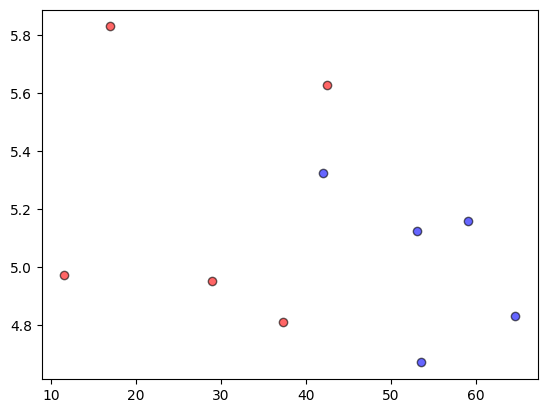

In [ ]:
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.show()

In [ ]:
X_train

array([[41.93544802,  5.32396799],
       [64.5800245 ,  4.83222524],
       [58.99018665,  5.15764564],
       [53.07749612,  5.12631732],
       [53.52178461,  4.67224898],
       [11.5858639 ,  4.97426043],
       [37.24633835,  4.81216871],
       [16.98562324,  5.82838474],
       [42.43497594,  5.62720924],
       [28.92235111,  4.95330251]])

In [ ]:
X_train.shape

(10, 2)

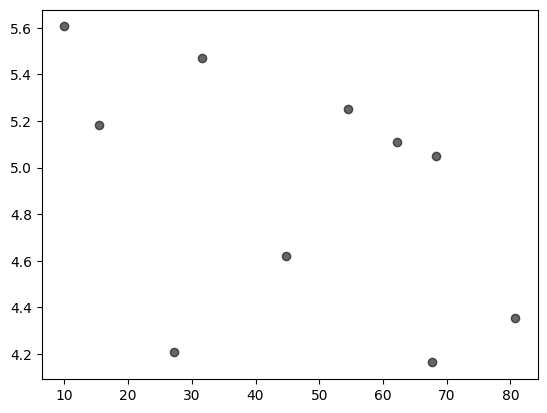

In [ ]:
plot_scatter(X_train)
plt.show()

In [ ]:
print('mean:',np.mean(X_train,axis=0))
print('std:',np.std(X_train,axis=0))

mean: [46.24388075  4.90176108]
std: [23.03092194  0.49851559]


##  K-means algorithm

    init : {‘k-means++’, ‘random’ or an ndarray} Method for initialization, defaults to ‘k-means++’:

    ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    ‘random’: choose k observations (rows) at random from data for the initial centroids.
    If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

In [ ]:
kmeans = KMeans(n_init='auto',n_clusters=2).fit(X_train)  #init='k-means++'
kmeans

KMeans(n_clusters=2)

In [ ]:
kmeans.predict([[80, 0], [100, 3]])

array([1, 1], dtype=int32)

In [ ]:
kmeans.predict([[28, 5]])

array([0], dtype=int32)

In [ ]:
kmeans.predict(X_train)

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[19.16461275,  5.25198256],
       [50.25517917,  5.07882616]])

In [ ]:
X_train

array([[41.93544802,  5.32396799],
       [64.5800245 ,  4.83222524],
       [58.99018665,  5.15764564],
       [53.07749612,  5.12631732],
       [53.52178461,  4.67224898],
       [11.5858639 ,  4.97426043],
       [37.24633835,  4.81216871],
       [16.98562324,  5.82838474],
       [42.43497594,  5.62720924],
       [28.92235111,  4.95330251]])

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int32)

####  Coordinates of cluster centers.

In [ ]:
kmeans.cluster_centers_

array([[19.16461275,  5.25198256],
       [50.25517917,  5.07882616]])

##    Plot Scatter
    1. 將資料點繪製成scatter圖. 請依據K-means分群後的結果來給予不同cluster有不同的顏色
       (cluster數非固定值)
    2. 將K-means中心點資料點也繪製上去並有較大圖樣

In [ ]:
kmeans.predict(X_train)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

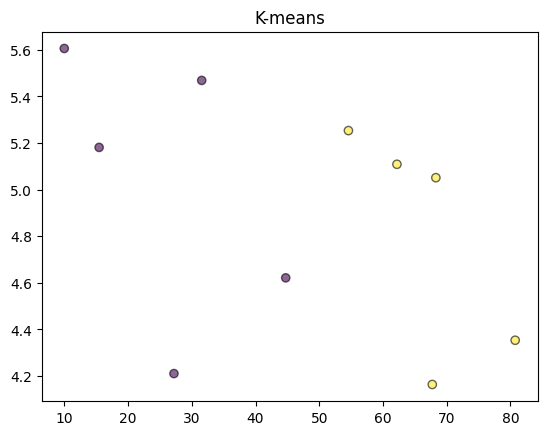

In [ ]:
plot_scatter(X_train,kmeans.predict(X_train))
plt.title("K-means")
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[25.7850646 ,  5.01744954],
       [66.7026969 ,  4.78607261]])

In [ ]:
kmeans.cluster_centers_[:,1]

array([5.01744954, 4.78607261])

In [ ]:
kmeans.predict(X_train)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[25.7850646 ,  5.01744954],
       [66.7026969 ,  4.78607261]])

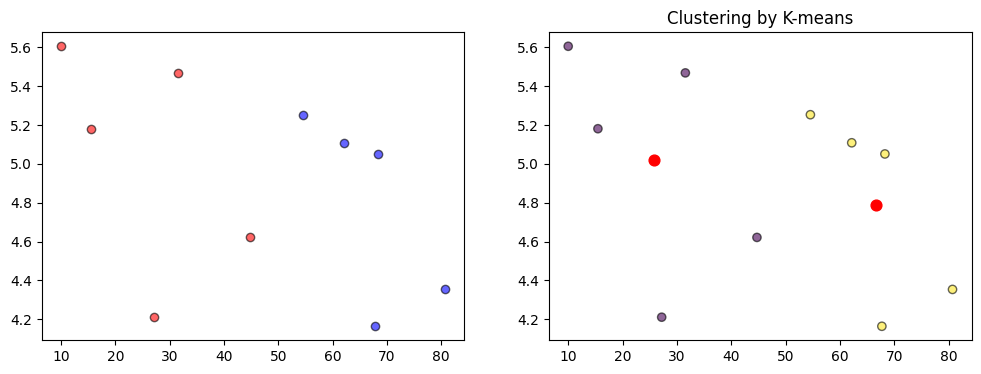

In [ ]:

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.subplot(122)
plot_scatter(X_train,color=kmeans.predict(X_train)/len(kmeans.cluster_centers_))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=60)
plt.title("Clustering by K-means")
plt.show()


#### Number of iterations run

In [ ]:
kmeans.n_iter_

2

#### K-means performance

In [ ]:
def distance(x, y):
    return np.sum((x - y) ** 2)


def score(x,model):
    '''
    cluster: sample pointes
    '''
    score=0
    n_cluster=len(model.cluster_centers_)
    for c in range(n_cluster):
         score+=distance(x[model.labels_==c],model.cluster_centers_[c])

    return score


In [ ]:
score(X_train,kmeans)

np.float64(1120.9534120425958)

In [ ]:
# skelearn : inertia_
kmeans.inertia_

1120.9534120425958

## make a circle  Dataset
       make_circles(): Make a large circle containing a smaller circle in 2d
        factor: Scale factor between inner and outer circle. ( 0 < double < 1 (default=.8))

In [ ]:
from sklearn.datasets import make_circles
# make a synthetic dataset (circle) #array of shape [n_samples, 2]
X, y = make_circles(n_samples=100, shuffle=True,factor=0.5, random_state=0, noise=0.05)
X[:10]

array([[-0.97084503, -0.12673179],
       [-0.01989117, -0.45880462],
       [ 0.95036645,  0.21475102],
       [ 0.3868271 ,  0.25685525],
       [-0.53375109, -0.00663921],
       [ 0.34970205, -0.2956982 ],
       [-0.41722927,  0.81854348],
       [-0.47625865,  0.08139568],
       [ 0.42783229,  0.26529816],
       [ 0.36259195, -0.27483444]])

In [ ]:
y[:10]

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1])

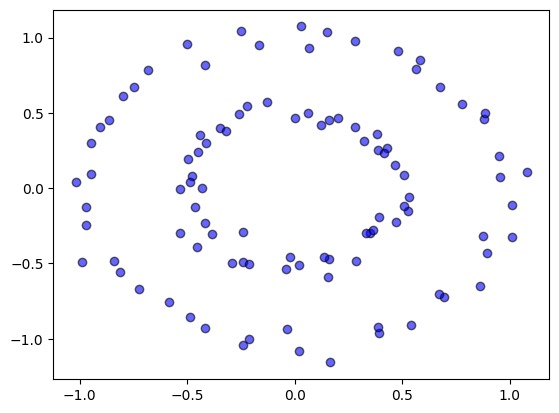

In [ ]:
plot_scatter(X,'b')
plt.show()

## Exercise
    如果使用K-means(n_clusters=2)結果為何?

In [ ]:
kmeans = KMeans(init='random',n_clusters=2).fit(X)
kmeans

KMeans(init='random', n_clusters=2)

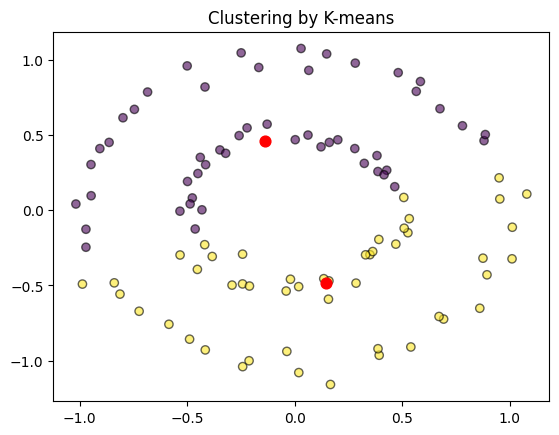

In [ ]:
plot_scatter(X,kmeans.predict(X))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=60)
plt.title("Clustering by K-means")
plt.show()


In [ ]:
kmeans.cluster_centers_

array([[-0.13824005,  0.45716552],
       [ 0.14402526, -0.48306983]])

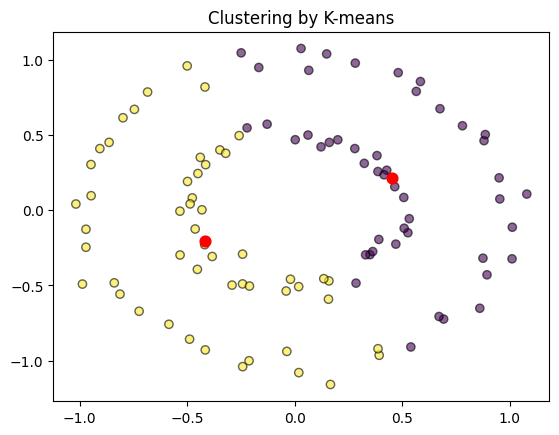

In [ ]:
kmeans = KMeans(n_init='auto',n_clusters=2).fit(X)
plot_scatter(X,kmeans.predict(X))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=60)
plt.title("Clustering by K-means")
plt.show()


In [ ]:
kmeans

KMeans(n_clusters=2)

## manually set centroid
If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

In [ ]:
X

array([[-0.97084503, -0.12673179],
       [-0.01989117, -0.45880462],
       [ 0.95036645,  0.21475102],
       [ 0.3868271 ,  0.25685525],
       [-0.53375109, -0.00663921],
       [ 0.34970205, -0.2956982 ],
       [-0.41722927,  0.81854348],
       [-0.47625865,  0.08139568],
       [ 0.42783229,  0.26529816],
       [ 0.36259195, -0.27483444],
       [ 0.41534308,  0.23495628],
       [ 0.28499277, -0.48470827],
       [-0.41862571, -0.22930158],
       [ 0.02939406,  1.07430209],
       [ 0.56514721,  0.78937127],
       [-0.81254486, -0.55757727],
       [-0.90616904,  0.40912042],
       [-0.94673872,  0.09604209],
       [-0.48894885, -0.85705833],
       [ 0.58450673,  0.85469206],
       [ 0.69240609, -0.72351839],
       [ 0.06171471,  0.49910141],
       [ 0.88026848,  0.46174426],
       [-0.45020702,  0.24354408],
       [ 0.86055779, -0.6516347 ],
       [ 1.01046915, -0.32319546],
       [ 0.67545788,  0.67409068],
       [ 0.52628596, -0.14981953],
       [-0.24250065,

In [ ]:
i=0
manual= np.array([[-3, 10],[0.0, 0.0]],np.float64)
kmeans = KMeans(init=manual,n_clusters=2,n_init=1,max_iter=1).fit(X)

In [ ]:
kmeans

KMeans(init=array([[-3., 10.],
       [ 0.,  0.]]), max_iter=1, n_clusters=2,
       n_init=1)

In [ ]:
kmeans.cluster_centers_

array([[ 0.1661865 , -1.15802566],
       [-0.00160799,  0.00811157]])

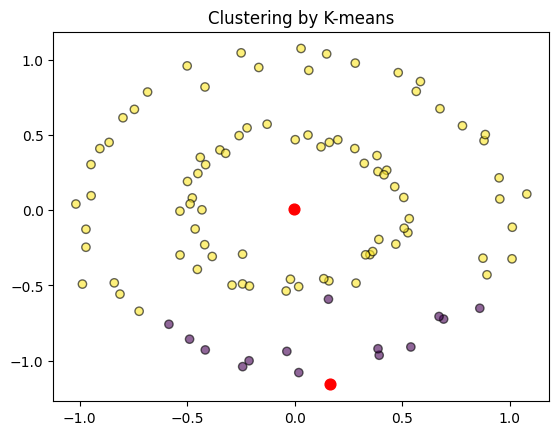

In [ ]:

i+=1

plot_scatter(X,kmeans.predict(X))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=60)
plt.title("Clustering by K-means")
plt.show()

## Apply K-means with re-scaled data

## Feature Re-scale

In [ ]:
X_train=X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[ 6.99519849e-05 -3.54980034e-03]
[0.55824178 0.57439439]


In [ ]:
#transform: (x-u)/std.
X_train_std = sc.transform(X)
X_train_std

array([[-1.73923742, -0.21445542],
       [-0.03575712, -0.79258229],
       [ 1.70230272,  0.38005388],
       [ 0.69281299,  0.45335585],
       [-0.9562542 , -0.00537856],
       [ 0.62630944, -0.50861987],
       [-0.74752417,  1.43123489],
       [-0.85326578,  0.14788703],
       [ 0.76626716,  0.46805464],
       [ 0.64939962, -0.47229681],
       [ 0.74389475,  0.41523052],
       [ 0.51039322, -0.83767962],
       [-0.75002566, -0.39302575],
       [ 0.0525294 ,  1.87650143],
       [ 1.01224467,  1.38044711],
       [-1.45566821, -0.96454192],
       [-1.62338082,  0.71844403],
       [-1.69605485,  0.1733859 ],
       [-0.87599823, -1.4859277 ],
       [ 1.04692412,  1.49416826],
       [ 1.2402084 , -1.25343946],
       [ 0.11042663,  0.8750977 ],
       [ 1.57673353,  0.81006024],
       [-0.80659849,  0.43018158],
       [ 1.54142502, -1.12829254],
       [ 1.80996701, -0.55649161],
       [ 1.20984841,  1.17974773],
       [ 0.94263102, -0.25465034],
       [-0.43452607,

In [ ]:
np.round(np.mean(X_train_std,axis=0),2)

array([-0., -0.])

In [ ]:
np.std(X_train_std,axis=0)

array([1., 1.])

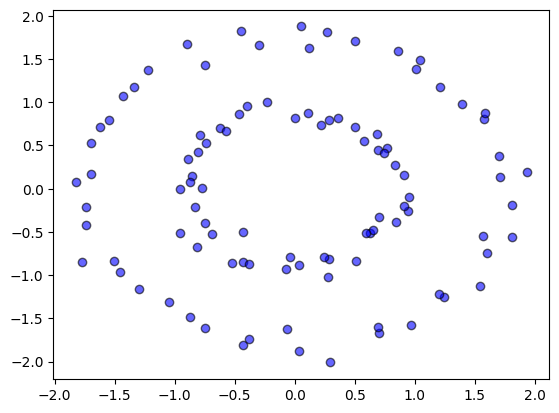

In [ ]:
plot_scatter(X_train_std,color='b')

In [ ]:
kmeans_std = KMeans(init='k-means++',n_init='auto',n_clusters=2, random_state=0).fit(X_train_std)
kmeans_std

KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans_std.labels_

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int32)

####  Coordinates of cluster centers

In [ ]:
kmeans_std.cluster_centers_

array([[-0.83837099, -0.25657549],
       [ 0.8054937 ,  0.2465137 ]])

### plot

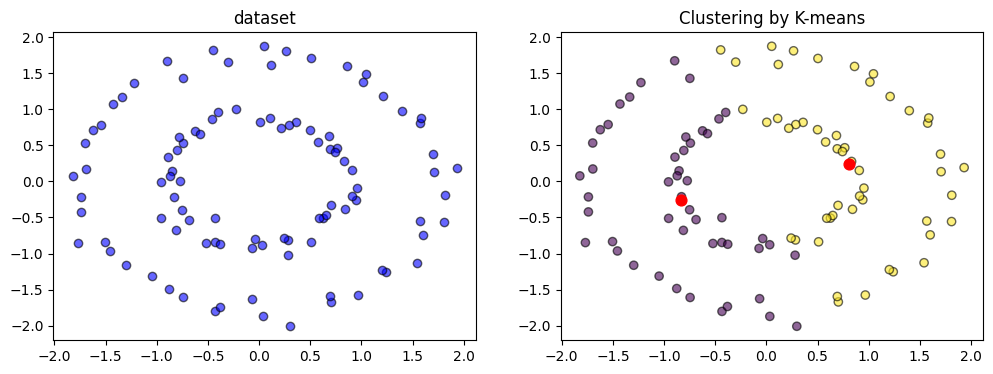

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_scatter(X_train_std,color='b')
plt.title("dataset")
plt.subplot(122)
plot_scatter(X_train_std,kmeans_std.predict(X_train_std))
plt.scatter(kmeans_std.cluster_centers_[:,0],kmeans_std.cluster_centers_[:,1],c='red',s=60)
plt.title("Clustering by K-means")
plt.show()


#### Number of iterations run

In [ ]:
kmeans_std.n_iter_

2

### Score

In [ ]:
score(X_train_std,kmeans_std)

np.float64(126.1448072820692)

In [ ]:
kmeans_std.inertia_

126.14480728206915